# Assignment1

Name: Yubin Hu

ID: 11712121

## 1 Part I: the perceptron

### Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gen_gaussian_distribution(size, mean=None, cov=None):
    if not mean:
        mean = np.random.randn(2)
    if not cov:
        cov = np.eye(2)
    data = np.random.multivariate_normal(mean, cov, size)
    return data

class Perceptron(object):

    def __init__(self, n_inputs, max_epochs=1e2, learning_rate=1e-2):
        """
        Initializes perceptron object.
        Args:
            n_inputs: number of inputs.
            max_epochs: maximum number of training cycles.
            learning_rate: magnitude of weight changes at each training cycle
        """
        self.n_inputs = n_inputs
        self.max_epochs = max_epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(self.n_inputs)
        self.bias = 0
        
        
    def forward(self, input):
        """
        Predict label from input 
        Args:
            input: array of dimension equal to n_inputs.
        """
        sum = np.sign(np.dot(input, self.weights))
        label = np.where(sum > 0, 1, -1)
        return label
        
    def train(self, training_inputs, labels):
        """
        Train the perceptron
        Args:
            training_inputs: list of numpy arrays of training points.
            labels: arrays of expected output value for the corresponding point in training_inputs.
        """
        train_size = len(training_inputs)
        epochs = 0
        while epochs < self.max_epochs:
            epochs += 1
            for i in range(train_size):
                if np.any(labels[i] * (np.dot(self.weights, training_inputs[i]) + self.bias) <= 0):
                    self.weights = self.weights + (self.learning_rate * labels[i] * training_inputs[i]).T
                    self.bias = self.bias + self.learning_rate * labels[i]
    
    def score(self, test_inputs, test_labels):
        pred_arr = np.where(self.forward(test_inputs) > 0, 1, -1)
        true_size = len(np.where(pred_arr == test_labels)[0])
        return true_size / len(test_labels)
    

def main():
    p = Perceptron(2)
    
    """
    gen dataset
    """
    data_size = 100
    train_size = 80
    x1 = gen_gaussian_distribution(data_size, [5, 5])
    x2 = gen_gaussian_distribution(data_size, [-5, -5])
    y1 = a_label = np.ones(data_size, dtype=np.int16)
    y2 = -y1
    x_train = np.concatenate((x1[:train_size], x2[:train_size]), axis=0)
    y_train = np.concatenate((y1[:train_size], y2[:train_size]), axis=0)
    x_test = np.concatenate((x1[train_size:], x2[train_size:]), axis=0)
    y_test = np.concatenate((y1[train_size:], y2[train_size:]), axis=0)
    
    """
    train model
    """
    p.train(x_train, y_train)
    
    """
    test model
    """
    acc = p.score(x_test, y_test)


if __name__ == "__main__":
    main()

### 1.1 Task 1

> Generate a dataset of points in R2. To do this, define two Gaussian distributions and sample 100 points from each. Your dataset should then contain a total of 200 points, 100 from each distribution. Keep 80 points per distribution as the training (160 in total), 20 for the test (40 in total).

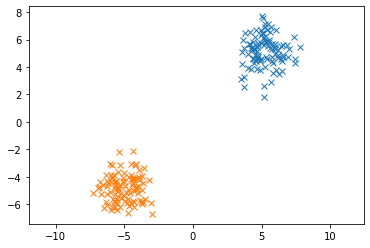

In [2]:
"""
gen dataset
"""
data_size = 100
train_size = 80
x1 = gen_gaussian_distribution(data_size, [5, 5])
x2 = gen_gaussian_distribution(data_size, [-5, -5])
y1 = a_label = np.ones(data_size, dtype=np.int16)
y2 = -y1
x_train = np.concatenate((x1[:train_size], x2[:train_size]), axis=0)
y_train = np.concatenate((y1[:train_size], y2[:train_size]), axis=0)
x_test = np.concatenate((x1[train_size:], x2[train_size:]), axis=0)
y_test = np.concatenate((y1[train_size:], y2[train_size:]), axis=0)


# plt
plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'x')
plt.axis('equal')
plt.savefig('./img/fig1.png')
plt.show()

We set `mean1 = [5, 5]` and `mean2 = [-5, -5]`, generate `cov1 and cov2` with `np.eve(2)` which returns a 2-D array with ones on the diagonal and zeros elsewhere.

### 1.2 Task 2

> Implement the perceptron following the specs in perceptron.py and the pseudocode in perceptronslides.pdf.

### 1.3 Task 3

> Train the perceptron on the training data (160 points) and test in on the remaining 40 test points. Compute the classification accuracy on the test set.

In [3]:
p = Perceptron(2)

"""
gen dataset
"""
data_size = 100
train_size = 80
x1 = gen_gaussian_distribution(data_size, [5, 5])
x2 = gen_gaussian_distribution(data_size, [-5, -5])
y1 = a_label = np.ones(data_size, dtype=np.int16)
y2 = -y1
x_train = np.concatenate((x1[:train_size], x2[:train_size]), axis=0)
y_train = np.concatenate((y1[:train_size], y2[:train_size]), axis=0)
x_test = np.concatenate((x1[train_size:], x2[train_size:]), axis=0)
y_test = np.concatenate((y1[train_size:], y2[train_size:]), axis=0)

"""
train model
"""
p.train(x_train, y_train)

"""
test model
"""
acc = p.score(x_test, y_test)

print(f'Perceptron test accuracy: {acc * 100}%')

Perceptron test accuracy: 100.0%


### 1.4 Task 4

> Experiment with different sets of points (generated as described in Task 1). What happens during the training if the means of the two Gaussians are too close and/or if their variance is too high?

In [4]:
for _ in range(10):
    p = Perceptron(2)

    """
    gen dataset
    """
    data_size = 100
    train_size = 80
    x1 = gen_gaussian_distribution(data_size, [1, 1])
    x2 = gen_gaussian_distribution(data_size, [1, 1])
    y1 = a_label = np.ones(data_size, dtype=np.int16)
    y2 = -y1
    x_train = np.concatenate((x1[:train_size], x2[:train_size]), axis=0)
    y_train = np.concatenate((y1[:train_size], y2[:train_size]), axis=0)
    x_test = np.concatenate((x1[train_size:], x2[train_size:]), axis=0)
    y_test = np.concatenate((y1[train_size:], y2[train_size:]), axis=0)

    """
    train model
    """
    p.train(x_train, y_train)

    """
    test model
    """
    acc = p.score(x_test, y_test)

    print(f'Perceptron test accuracy: {acc * 100}%')

Perceptron test accuracy: 47.5%
Perceptron test accuracy: 52.5%
Perceptron test accuracy: 50.0%
Perceptron test accuracy: 60.0%
Perceptron test accuracy: 57.49999999999999%
Perceptron test accuracy: 45.0%
Perceptron test accuracy: 55.00000000000001%
Perceptron test accuracy: 47.5%
Perceptron test accuracy: 52.5%
Perceptron test accuracy: 57.49999999999999%


We run 10 times for the close Gaussians([1, 1], [1, 1]), and accuracy is lower then 50%.

In [5]:
for _ in range(10):
    p = Perceptron(2)

    """
    gen dataset
    """
    data_size = 100
    train_size = 80
    x1 = gen_gaussian_distribution(data_size, [-5, -5])
    x2 = gen_gaussian_distribution(data_size, [1, 1])
    y1 = a_label = np.ones(data_size, dtype=np.int16)
    y2 = -y1
    x_train = np.concatenate((x1[:train_size], x2[:train_size]), axis=0)
    y_train = np.concatenate((y1[:train_size], y2[:train_size]), axis=0)
    x_test = np.concatenate((x1[train_size:], x2[train_size:]), axis=0)
    y_test = np.concatenate((y1[train_size:], y2[train_size:]), axis=0)

    """
    train model
    """
    p.train(x_train, y_train)

    """
    test model
    """
    acc = p.score(x_test, y_test)

    print(f'Perceptron test accuracy: {acc * 100}%')

Perceptron test accuracy: 85.0%
Perceptron test accuracy: 97.5%
Perceptron test accuracy: 97.5%
Perceptron test accuracy: 97.5%
Perceptron test accuracy: 97.5%
Perceptron test accuracy: 97.5%
Perceptron test accuracy: 97.5%
Perceptron test accuracy: 100.0%
Perceptron test accuracy: 92.5%
Perceptron test accuracy: 90.0%


We run 10 times for the Gaussians with high variance([-5, -5], [1, 1]), and accuracy is higher then the close Gaussians, over 90%.